In [1]:
import os
from os import path
import pandas as pd
import numpy as np
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
import community as community_louvain
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
import json
from cdlib import algorithms
import random

os.chdir('./Dati')
print("current directory is : " + os.getcwd())

current directory is : C:\Users\david\Desktop\Progetto\Twitter\Dati


# LOAD DATASET

In [ ]:
dataset = pd.read_csv('dataset_finale.csv')
len(dataset)

In [ ]:
print(dataset.info())

## Creazione grafo


In [ ]:
# questa funzione prende il valore masssimo di sentiment analysis e assegna un colore, se valore = 0 sentiment = neutral 

def extract_color(s):
    color_dict= {'Happy': 'green', 'Angry': 'blue', 'Surprise': 'yellow', 'Sad': 'grey', 'Fear': 'red', 'neutral': 'purple' }
    j = json.loads(s.replace("'", "\""))
    if j['Happy']==0.0 and j['Angry']==0.0 and j['Surprise']==0.0 and j['Sad']==0.0 and j['Fear']==0.0:
        return color_dict['neutral']
    return color_dict[max(j.items(), key=itemgetter(1))[0]]

In [ ]:
#i nodi sono tweets_user_id - retweets_user_id
grafo = nx.Graph()
color_dict = {}
for (user_retweet, user_tweet, sentiment) in zip(dataset['user_id'], dataset['user_id_tweet'], dataset['sentiment_analysis_tweet']):
    grafo.add_edge(user_tweet, user_retweet)
    color_dict[user_tweet] = extract_color(sentiment)
    color_dict[user_retweet] = 'black'

nx.set_node_attributes(grafo, color_dict, 'color')
print(nx.info(grafo))

In [ ]:
nx.write_gexf(grafo, 'grafo.gexf')

In [55]:
grafo = nx.read_gexf('grafo.gexf')
print(nx.info(grafo))

Name: 
Type: Graph
Number of nodes: 149601
Number of edges: 538845
Average degree:   7.2038


# MEASURES GRAPH

### DEGREE ASSORTATIVITY:
corrisponde alla misura di similarità tra le connessione del grafo rispetto al degree dei nodi.

In [4]:
degree_assortativity = 0
if path.exists("./file pickle/degree_assortativity.pkl"):
    print("EXIST")
    infile = open("./file pickle/degree_assortativity.pkl",'rb')
    degree_assortativity = pickle.load(infile)
    infile.close()
else:
    degree_assortativity = assortativity.degree_assortativity_coefficient(grafo)
    f = open("./file pickle/degree_assortativity.pkl","wb")
    pickle.dump(degree_assortativity, f)
    f.close()
    
print('Degree assortativity: ',degree_assortativity)

EXIST
Degree assortativity:  -0.12418749646014031


### AVERAGE DEGREE OF THE NEIGHBORHOOD:
corrisponde al degree medio del vicinato di ciascun nodo.

In [5]:
avg_neighbor_degree = {}
if path.exists("./file pickle/avg_neighbor_degree.pkl"):
    print("EXIST")
    infile = open("./file pickle/avg_neighbor_degree.pkl",'rb')
    avg_neighbor_degree = pickle.load(infile)
    infile.close()
else:
    avg_neighbor_degree= assortativity.average_neighbor_degree(grafo)
    f = open("./file pickle/avg_neighbor_degree.pkl","wb")
    pickle.dump(avg_neighbor_degree, f)
    f.close()

sorted_avg_neighbor = sorted(avg_neighbor_degree.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by average neighbor degree:")
for b in sorted_avg_neighbor[:5000]:
    print(b)


EXIST
Top 20 nodes by average neighbor degree:
('22135232', 7607.0)
('871198385818259456', 7607.0)
('997571033153638400', 7607.0)
('554736713', 7607.0)
('756630734', 7607.0)
('821409066', 7607.0)
('850198921', 7607.0)
('431658605', 7607.0)
('1218700439249674240', 7607.0)
('2331172921', 7607.0)
('26671237', 7607.0)
('1267197809045852160', 7607.0)
('24193621', 7607.0)
('1304893771545362432', 7607.0)
('853325065945042946', 7607.0)
('822852625427234816', 7607.0)
('55260264', 7607.0)
('578185918', 7607.0)
('839946634867978240', 7607.0)
('83663187', 7607.0)
('34758614', 7607.0)
('1276101528160518145', 7607.0)
('91461952', 7607.0)
('723495207149441024', 7607.0)
('196447125', 7607.0)
('541239791', 7607.0)
('1263950462530867200', 7607.0)
('794431871111360512', 7607.0)
('576658766', 7607.0)
('923702438', 7607.0)
('1010640714206769153', 7607.0)
('2625625012', 7607.0)
('573744928', 7607.0)
('3959427363', 7607.0)
('27987267', 7607.0)
('580073682', 7607.0)
('24442773', 7607.0)
('3239107841', 7607.0)

('201377061', 3876.5)
('2284002356', 3876.0)
('4876046333', 3875.5)
('37815218', 3875.5)
('13442022', 3875.5)
('1239386802856706049', 3875.5)
('1059909834156331008', 3875.0)
('113560967', 3875.0)
('1320932959', 3875.0)
('2430047892', 3875.0)
('863055457753092096', 3875.0)
('1084558689388904449', 3875.0)
('330575788', 3875.0)
('4797833511', 3874.5)
('2894695097', 3874.5)
('862024284', 3874.5)
('872806832682795009', 3874.5)
('1390928862', 3874.5)
('4568118332', 3874.5)
('238718627', 3874.5)
('63294630', 3874.5)
('4856477541', 3874.0)
('819307296', 3874.0)
('886975151467773953', 3874.0)
('60087571', 3874.0)
('20010232', 3874.0)
('2493673550', 3874.0)
('54730841', 3873.5)
('713453071637090308', 3873.5)
('390867049', 3873.0)
('1057615159181611008', 3873.0)
('3097253483', 3873.0)
('2929567145', 3872.5)
('1294880859426902016', 3872.5)
('41828871', 3872.5)
('2679391633', 3872.5)
('779182984494624768', 3872.5)
('262248599', 3872.5)
('230678039', 3872.5)
('118372733', 3872.0)
('41398492', 3872.0

('896367547448254464', 2734.0)
('822855033263943681', 2733.4)
('802939510652805120', 2731.0)
('3151819718', 2730.0)
('328473338', 2730.0)
('833890670238715904', 2729.3333333333335)
('36267711', 2729.3333333333335)
('2710694294', 2729.0)
('1194217659853922304', 2728.6666666666665)
('817302081321189376', 2728.0)
('1240497218', 2727.75)
('529023681', 2727.25)
('1232978264160919553', 2726.6666666666665)
('2991680937', 2726.3333333333335)
('9543992', 2726.3333333333335)
('195192814', 2726.0)
('821062432735039488', 2726.0)
('1204409869345808387', 2726.0)
('36430308', 2726.0)
('72081472', 2724.5)
('3622922233', 2724.3333333333335)
('570737640', 2723.6666666666665)
('425373857', 2723.6666666666665)
('1119041007692255232', 2723.3333333333335)
('901796797', 2723.3333333333335)
('1030028049679572992', 2722.0)
('540413213', 2722.0)
('1011847519', 2721.6666666666665)
('359584049', 2721.6666666666665)
('22455722', 2721.6666666666665)
('1254135911396388867', 2721.3333333333335)
('800566528043196418',

('1248738919174242305', 2235.0)
('1042314726850478080', 2235.0)
('1212287062293958656', 2235.0)
('1466338231', 2235.0)
('1047556144175243264', 2235.0)
('1078332353897029632', 2234.0)
('399174813', 2233.0)
('874933687', 2233.0)
('3711852739', 2233.0)
('47983954', 2232.75)
('1178614014202523649', 2232.75)
('477060496', 2232.5)
('19320515', 2231.75)
('802567838418419712', 2228.8)
('842603317675016192', 2227.5)
('1265378248218853381', 2227.0)
('19624477', 2226.75)
('306055499', 2226.75)
('814316767665418248', 2226.4)
('119267559', 2226.0)
('300501843', 2225.3333333333335)
('751429685230374912', 2225.25)
('40790350', 2225.0)
('200256030', 2224.25)
('1281082280174219264', 2224.0)
('826098034610151425', 2224.0)
('30034743', 2224.0)
('1600240886', 2224.0)
('4467282014', 2224.0)
('1113598998', 2224.0)
('1284864732164427776', 2224.0)
('800514613070573568', 2223.6666666666665)
('84602512', 2223.5)
('1036405168080793600', 2223.5)
('980189208248832001', 2223.5)
('988872494282166273', 2223.5)
('8378

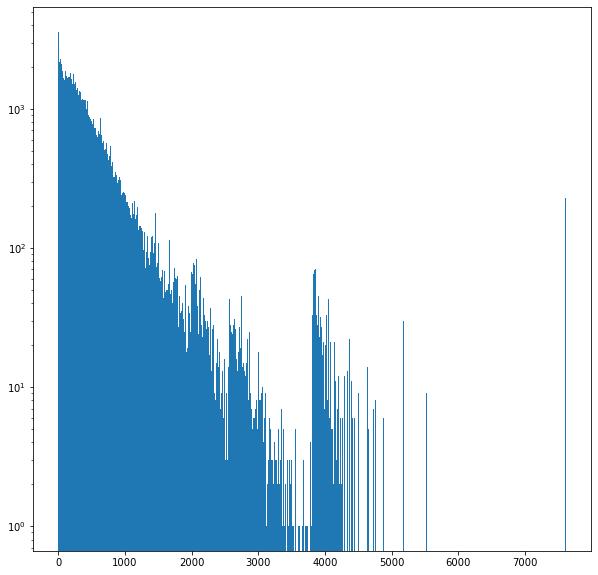

In [6]:
plt.figure(figsize=(10,10))
plt.hist(avg_neighbor_degree.values(), bins=1000, log=True, )
plt.show()

In [7]:
print(len(avg_neighbor_degree))

149601


### DEGREE:
corrisponde al numero di nodi adiacente per ogni nodo.

In [8]:
degree_dict ={ }
if path.exists("./file pickle/degree_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/degree_dict.pkl",'rb')
    degree_dict = dict(pickle.load(infile))
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    infile.close()
else:
    print("COMPUTING...")
    degree_dict = dict(grafo.degree(grafo.nodes()))
    f = open("./file pickle/degree_dict.pkl","wb")
    pickle.dump(degree_dict, f)
    f.close()

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

EXIST
Top 20 nodes by degree:
('18831926', 7607)
('1178039474346852352', 3997)
('493714995', 3426)
('953924228306305024', 2744)
('2876041031', 2238)
('15976705', 2134)
('535643852', 2002)
('728039605', 1994)
('1383272101', 1906)
('1917731', 1856)
('1222990700536426496', 1731)
('897922741814394881', 1690)
('1221462414744596483', 1674)
('138168339', 1668)
('14146966', 1657)
('288277167', 1564)
('508591081', 1502)
('884455440293269505', 1455)
('314548237', 1439)
('16721452', 1410)


### AVERAGE CLUSTER:
corrisponde alla media del coefficiente di cluster per il grafo.

In [9]:
avg_cluster = 0
if path.exists("./file pickle/avg_cluster.pkl"):
    print("EXIST")
    infile = open("./file pickle/avg_cluster.pkl",'rb')
    avg_cluster = pickle.load(infile)
    infile.close()
else:
    print("COMPUTING AVG CLUSTER")
    avg_cluster = nx.average_clustering(grafo)
    f = open("./file pickle/avg_cluster.pkl","wb")
    pickle.dump(avg_cluster, f)
    f.close()

print('Average cluster: ',avg_cluster)

EXIST
Average cluster:  0.04028929655861669


### DENSITY

corrisponde alla media dei gradi dei nodi

In [10]:
density = 0
if path.exists("./file pickle/density.pkl"):
    print("EXIST")
    infile = open("./file pickle/density.pkl",'rb')
    density = pickle.load(infile)
    infile.close()
else:
    density = nx.density(grafo)
    f = open("./file pickle/density.pkl","wb")
    pickle.dump(density, f)
    f.close()

print('Average Density: ',density)

EXIST
Average Density:  4.815348935119289e-05


### DIAMETER:
corrisponde alla lunghezza del più lungo cammino medio nel grafo.

In [11]:
if path.exists("./file pickle/largest_component.pkl") & path.exists("./file pickle/subgraph.pkl") & path.exists("./file pickle/diameter.pkl"):
    print("EXIST")
    infile = open("./file pickle/largest_component.pkl",'rb')
    largest_component = pickle.load(infile)
    infile.close()
    
    infile = open("./file pickle/subgraph.pkl",'rb')
    subgraph = pickle.load(infile)
    infile.close()
    
    infile = open("./file pickle/diameter.pkl",'rb')
    diameter = pickle.load(infile)
    infile.close()
else:
    components = nx.connected_components(grafo)
    largest_component = max(components, key=len)

    subgraph = grafo.subgraph(largest_component)
    diameter = nx.diameter(subgraph)
    
    f = open("./file pickle/largest_component.pkl","wb")
    pickle.dump(largest_component, f)
    f.close()
    
    f = open("./file pickle/subgraph.pkl","wb")
    pickle.dump(subgraph, f)
    f.close()
    
    f = open("./file pickle/diameter.pkl","wb")
    pickle.dump(diameter, f)
    f.close()

print("Network diameter of largest component:", diameter)

EXIST
Network diameter of largest component: 16


### TRIADIC CLOSURE

Corrisponde alla frazione di tutti i possibili triangoli

In [12]:
triadic_closure = 0
if path.exists("./file pickle/triadic_closure.pkl"):
    print("EXIST")
    infile = open("./file pickle/triadic_closure.pkl",'rb')
    triadic_closure = pickle.load(infile)
    infile.close()
else:
    triadic_closure = nx.transitivity(grafo)
    f = open("./file pickle/triadic_closure.pkl","wb")
    pickle.dump(triadic_closure, f)
    f.close()
print("Triadic closure: ", triadic_closure)

EXIST
Triadic closure:  0.0012337540519687976


### BETWEENNESS

Corrisponde alla somma della frazione dei cammini minimi di tutte le coppie che passano per il nodo v

In [13]:
betweenness_dict = {}

if path.exists("./file pickle/betweenness_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/betweenness_dict.pkl",'rb')
    betweenness_dict = pickle.load(infile)
    infile.close()
else:
    betweenness_dict = betweenness_centrality_parallel(grafo) 
    f = open("./file pickle/betweenness_dict.pkl","wb")
    pickle.dump(betweenness_dict, f)
    f.close()

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

EXIST
Top 20 nodes by betweenness centrality:
('952247125185720320', 0.1335578223148495)
('18831926', 0.12333453873760528)
('1178039474346852352', 0.040112413066163)
('1917731', 0.03129597423481026)
('493714995', 0.024448623814695203)
('953924228306305024', 0.024127011140798526)
('31127446', 0.020448509055235986)
('728039605', 0.01997280730060265)
('535643852', 0.018929632731879392)
('884455440293269505', 0.01751969707780895)
('508591081', 0.015744101444260614)
('1222990700536426496', 0.013375903046866405)
('355989081', 0.013275877046223902)
('2876041031', 0.012925468746606883)
('897922741814394881', 0.012243371886956917)
('1244892413262311425', 0.011716388159196001)
('15976705', 0.011408997533904322)
('2783875490', 0.011263382097571268)
('1221462414744596483', 0.011012330950460569)
('1383272101', 0.010646153832419566)


### EIGENVECTOR CENTRALITY

Corrisponde alla centralità di un nodo in base alla centralità dei suoi vicini

In [14]:
eigenvector_dict = {}
if path.exists("./file pickle/eigenvector_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/eigenvector_dict.pkl",'rb')
    eigenvector_dict = pickle.load(infile)
    infile.close()
else:
    eigenvector_dict = nx.eigenvector_centrality_numpy(grafo)
    f = open("./file pickle/eigenvector_dict.pkl","wb")
    pickle.dump(eigenvector_dict, f)
    f.close()

sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:20]:
    print(b)

EXIST
Top 20 nodes by eigenvector centrality:
('18831926', 0.5909815152466275)
('953924228306305024', 0.1319122197836289)
('493714995', 0.11279994119128532)
('2876041031', 0.08390256965107072)
('1383272101', 0.07728515491477951)
('15976705', 0.07109437712926613)
('138168339', 0.05760329747645161)
('14146966', 0.05581588396184394)
('215207998', 0.05279065796601355)
('897922741814394881', 0.052473917345764204)
('1221462414744596483', 0.05190548451164832)
('16721452', 0.051119469485262053)
('288277167', 0.050370109356663396)
('508591081', 0.04740964360192078)
('14298769', 0.04732487322987814)
('21733692', 0.044334080590335265)
('812361923304034304', 0.043109775830969574)
('252357183', 0.04276712961173)
('16041234', 0.041646039444852)
('820452522494226433', 0.04155238367256988)


### Vote Rank: calcola un elenco di nodi influenti in un grafico utilizzando l'algoritmo di VoteRank
VoteRank calcola una classifica dei nodi in un grafico G in base a uno schema di voto. Con VoteRank, tutti i nodi votano per ciascuno dei suoi vicini e il nodo con i voti più alti viene eletto in modo iterativo. La capacità di voto dei vicini esterni ai nodi eletti viene ridotta nei turni successivi.

In [15]:
voterank_list = []
if path.exists("./file pickle/voterank_list.pkl"):
    print("EXIST")
    infile = open("./file pickle/voterank_list.pkl",'rb')
    voterank_list = pickle.load(infile)
    infile.close()
else:
    voterank_list = nx.voterank(grafo)
    f = open("./file pickle/voterank_list.pkl","wb")
    pickle.dump(voterank_list, f)
    f.close()

print("Top 20 nodes by voterank_list:")
for b in voterank_list[:20]:
    print('ID: ',b)

EXIST
Top 20 nodes by voterank_list:
ID:  18831926
ID:  1178039474346852352
ID:  493714995
ID:  953924228306305024
ID:  2876041031
ID:  15976705
ID:  728039605
ID:  535643852
ID:  1917731
ID:  1383272101
ID:  1222990700536426496
ID:  1221462414744596483
ID:  897922741814394881
ID:  138168339
ID:  14146966
ID:  288277167
ID:  884455440293269505
ID:  508591081
ID:  314548237
ID:  16813044


In [16]:
top_betweenness = sorted_betweenness[:20]

print("INFLUENT PEOPLE")
for tb in top_betweenness: 
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    eigen = eigenvector_dict[tb[0]]
    print("ID:", tb[0], "- Betweenness: ","{:.5f}".format(tb[1]), " | Degree:" , degree, " | eigenvalue: ", "{:.5f}".format(eigen))

INFLUENT PEOPLE
ID: 952247125185720320 - Betweenness:  0.13356  | Degree: 337  | eigenvalue:  0.02212
ID: 18831926 - Betweenness:  0.12333  | Degree: 7607  | eigenvalue:  0.59098
ID: 1178039474346852352 - Betweenness:  0.04011  | Degree: 3997  | eigenvalue:  0.00158
ID: 1917731 - Betweenness:  0.03130  | Degree: 1856  | eigenvalue:  0.03722
ID: 493714995 - Betweenness:  0.02445  | Degree: 3426  | eigenvalue:  0.11280
ID: 953924228306305024 - Betweenness:  0.02413  | Degree: 2744  | eigenvalue:  0.13191
ID: 31127446 - Betweenness:  0.02045  | Degree: 918  | eigenvalue:  0.01697
ID: 728039605 - Betweenness:  0.01997  | Degree: 1994  | eigenvalue:  0.00136
ID: 535643852 - Betweenness:  0.01893  | Degree: 2002  | eigenvalue:  0.00112
ID: 884455440293269505 - Betweenness:  0.01752  | Degree: 1455  | eigenvalue:  0.00108
ID: 508591081 - Betweenness:  0.01574  | Degree: 1502  | eigenvalue:  0.04741
ID: 1222990700536426496 - Betweenness:  0.01338  | Degree: 1731  | eigenvalue:  0.00058
ID: 355

# COMMUNITIES

In [32]:
dataset_tweet = pd.read_csv('./dataset_tweet.csv')

In [46]:
def community_sentiment(dict_community, data, index_community):
    lista = []
    for c, a in dict_community.items():
        if(a==index_community):
            lista.append(c)
    # print(len(lista))
    
    dt = pd.DataFrame()
    #cont = 0
    for a in lista:
        #cont += 1
        #if(cont%5000==0): 
            #print(cont)
        dt = dt.append(data[data['user_id_tweet']==int(a)])
    print(len(dt))
    return dt

In [41]:
# questa funzione prende il valore masssimo di sentiment analysis 
def extract_sentiment(s):
    j = json.loads(s.replace("'", "\""))
    if j['Happy']==0.0 and j['Angry']==0.0 and j['Surprise']==0.0 and j['Sad']==0.0 and j['Fear']==0.0:
        return 'Neutral'
    return max(j.items(), key=itemgetter(1))[0]

# questa funzione calcola il numero di emozioni per ogni persona all'interno della community
def calcola_sentiment(data):
    sentiment_dict = {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0, 'Neutral': 0}
    for sentiment_comment in data['sentiment_analysis_tweet']:
        s = extract_sentiment(sentiment_comment)
        sentiment_dict[s] = sentiment_dict[s]+1
    a = pd.DataFrame(sentiment_dict, index=[0])
    return a

## MODULARITY COMMUNITY
La modularità è una misura della struttura delle reti o dei grafici. È stato progettato per misurare la forza della divisione di una rete in moduli (chiamati anche gruppi, cluster o comunità). Le reti con elevata modularità hanno connessioni fitte tra i nodi all'interno dei moduli ma connessioni sparse tra i nodi in moduli diversi. La modularità è spesso utilizzata nei metodi di ottimizzazione per rilevare la struttura della comunità nelle reti. Tuttavia, è stato dimostrato che la modularità soffre di un limite di risoluzione e, quindi, non è in grado di rilevare piccole comunità

In [48]:
if path.exists("./file pickle/modular_communities.pkl"):
    print("EXIST")
    infile = open("./file pickle/modular_communities.pkl",'rb')
    modular_communities = pickle.load(infile)
    infile.close()
else:
    modular_communities = community.greedy_modularity_communities(grafo)
    f = open("./file pickle/modular_communities.pkl","wb")
    pickle.dump(modular_communities, f)
    f.close()
    
modularity_dict = {} 
for i,c in enumerate(modular_communities): 
    for name in c: 
        modularity_dict[name] = i

modularity_dict_ = {}
for i in range(max(modularity_dict.values())+1):
    modularity_dict_[i] = len([k for (k, v) in modularity_dict.items() if v == i ])
print("N° di community trovate: ", len(modularity_dict_))
print("N° utenti per community:\n", modularity_dict_) 

EXIST
N° di community trovate:  157
N° utenti per community:
 {0: 53208, 1: 50457, 2: 11872, 3: 10746, 4: 7265, 5: 6331, 6: 3460, 7: 1156, 8: 1152, 9: 533, 10: 398, 11: 293, 12: 270, 13: 185, 14: 178, 15: 135, 16: 91, 17: 87, 18: 82, 19: 68, 20: 61, 21: 55, 22: 51, 23: 48, 24: 47, 25: 44, 26: 40, 27: 37, 28: 33, 29: 33, 30: 32, 31: 31, 32: 30, 33: 29, 34: 28, 35: 28, 36: 28, 37: 27, 38: 26, 39: 25, 40: 24, 41: 21, 42: 20, 43: 19, 44: 19, 45: 18, 46: 18, 47: 18, 48: 17, 49: 16, 50: 15, 51: 15, 52: 14, 53: 14, 54: 13, 55: 13, 56: 12, 57: 12, 58: 12, 59: 12, 60: 11, 61: 11, 62: 11, 63: 11, 64: 11, 65: 10, 66: 10, 67: 10, 68: 10, 69: 10, 70: 10, 71: 9, 72: 9, 73: 9, 74: 9, 75: 9, 76: 9, 77: 9, 78: 9, 79: 9, 80: 8, 81: 8, 82: 8, 83: 8, 84: 8, 85: 8, 86: 8, 87: 8, 88: 8, 89: 8, 90: 8, 91: 8, 92: 7, 93: 7, 94: 7, 95: 7, 96: 7, 97: 7, 98: 7, 99: 7, 100: 7, 101: 7, 102: 7, 103: 7, 104: 7, 105: 7, 106: 7, 107: 7, 108: 7, 109: 6, 110: 6, 111: 6, 112: 6, 113: 6, 114: 5, 115: 5, 116: 5, 117: 5, 118

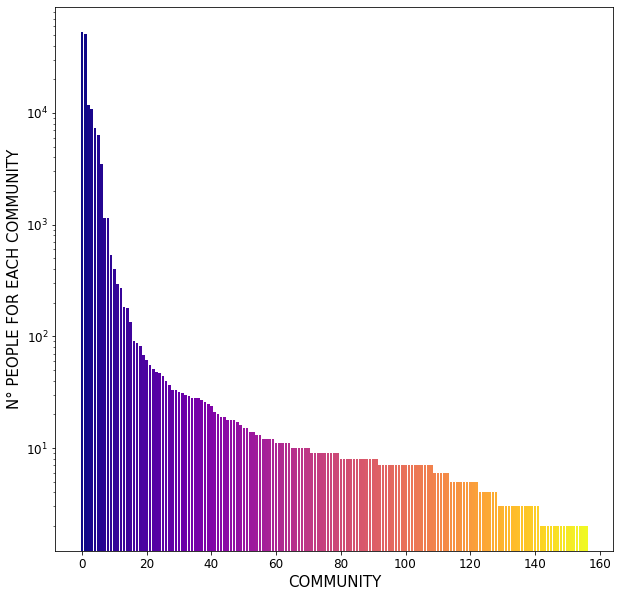

In [18]:
def plot_community(dictionary):
    x = list(dictionary.keys())
    y = list(dictionary.values())
    plt.figure(figsize=(10,10))
    cmap = cm.get_cmap('prism', len(dictionary))
    plt.xlabel("COMMUNITY",fontsize=15)
    plt.ylabel("N° PEOPLE FOR EACH COMMUNITY",fontsize=15);
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    list_color = ['viridis', 'prism', 'plasma', 'cividis']
    color = list_color[random.randint(0, len(list_color)-1)]
    my_cmap = plt.get_cmap(color, len(dictionary))
    plt.bar(x, y, color=my_cmap.colors)
    plt.yscale('log')
    plt.show()

plot_community(modularity_dict_)

Considerando la community più numerosa di **Modularity** si analizza la Sentiment all'interno del gruppo


In [51]:
data_modularity = community_sentiment(modularity_dict, dataset_tweet, 0)
data_modularity.to_csv("tweet_modularity0.csv", index=False)
sentiment_modularity_0 = calcola_sentiment(data_modularity)
sentiment_modularity_0

,Happy,Angry,Surprise,Sad,Fear,Neutral
0,660,222,1157,4107,1968,54


In [50]:
data_modularity = pd.read_csv("./tweet_modularity0.csv")
data_modularity

,created_at,id,id_str,full_text,source,truncated,user,quoted_status_id,quoted_status_id_str,is_quote_status,quoted_status,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,user_id_tweet,sentiment_analysis_tweet
0,Sun Aug 30 09:49:45 +0000 2020,1300007793798324225,1300007793798324225,@MayorofLondon As a professional mask fitter f...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 142825308, 'id_str': '142825308', 'name...",NaN,NaN,False,NaN,105,181,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1300007791277596674, 'id_str...",False,False,False,142825308,"{'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.09..."
1,Wed Aug 26 12:35:50 +0000 2020,1298600037933551616,1298600037933551616,@educationgovuk @10DowningStreet As a professi...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 142825308, 'id_str': '142825308', 'name...",NaN,NaN,False,NaN,11,13,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1298600035547000833, 'id_str...",False,False,False,142825308,"{'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.09..."
2,Thu Aug 06 04:16:39 +0000 2020,1291226655642521600,1291226655642521600,Canada are you REALLY going to wear masks for ...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 26563557, 'id_str': '26563557', 'name':...",1.290796e+18,1.290796e+18,True,{'created_at': 'Tue Aug 04 23:47:21 +0000 2020...,11,29,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,False,26563557,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.25,..."
3,Sun Aug 30 14:35:39 +0000 2020,1300079742259990528,1300079742259990528,They tried to silence her but I want to hear w...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 26563557, 'id_str': '26563557', 'name':...",NaN,NaN,False,NaN,10,34,"{'hashtags': [{'text': 'science', 'indices': [...","{'media': [{'id': 1300079378643267585, 'id_str...",False,False,False,26563557,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.75,..."
4,Fri Jul 17 02:29:18 +0000 2020,1283951886173966336,1283951886173966336,"Illegal migrants escorted to our shores, herit...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 99934979, 'id_str': '99934979', 'name':...",1.282990e+18,1.282990e+18,True,{'created_at': 'Tue Jul 14 10:45:46 +0000 2020...,64,101,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,False,99934979,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.4, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8163,Sun Oct 11 23:32:27 +0000 2020,1315435120912986113,1315435120912986113,"Oh, and remember this. Surgeon General against...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 1051129297514172416, 'id_str': '1051129...",1.281588e+18,1.281588e+18,True,{'created_at': 'Fri Jul 10 13:54:25 +0000 2020...,14,21,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,False,1051129297514172416,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
8164,Wed Sep 09 21:08:28 +0000 2020,1303802474738917378,1303802474738917378,Who are you insane people that insist an infan...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 1051129297514172416, 'id_str': '1051129...",1.303552e+18,1.303552e+18,True,{'created_at': 'Wed Sep 09 04:31:32 +0000 2020...,14,32,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,False,1051129297514172416,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ..."
8165,Thu Sep 24 21:00:05 +0000 2020,1309236183181012993,1309236183181012993,If you want to call to complain about the mom ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 1051129297514172416, 'id_str': '1051129...",1.309147e+18,1.309147e+18,True,{'created_at': 'Thu Sep 24 15:04:27 +0000 2020...,14,15,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,False,1051129297514172416,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.2,

## Louvain (Utilizza modularity)
Il metodo Louvain per il rilevamento della comunità è un algoritmo basasto sulla massimizzazione del punteggio di modularità per ogni community, dove la modularità quantifica la qualità di un'assegnamento di nodi ad una certa community. Ciò significa valutare quanto siano più densamente connessi i nodi all'interno di una community, rispetto a quanto sarebbero connessi in una rete casuale.

In [18]:
if path.exists("./file pickle/partition_louvain.pkl") & path.exists("./file pickle/partition_louvain_dict.pkl"):
    print("EXIST")
    infile = open("./file pickle/partition_louvain.pkl",'rb')
    partition_louvain = pickle.load(infile)
    infile.close()
    
    infile = open("./file pickle/partition_louvain_dict.pkl",'rb')
    partition_louvain_dict = pickle.load(infile)
    infile.close()
else:
    partition_louvain = community_louvain.best_partition(grafo)
    f = open("./file pickle/partition_louvain.pkl","wb")
    pickle.dump(partition_louvain, f)
    f.close()
    partition_louvain_dict = {}
    for i in range(max(partition_louvain.values())+1):
        partition_louvain_dict[i] = len([k for (k, v) in partition_louvain.items() if v == i ])
    
    f = open("./file pickle/partition_louvain_dict.pkl","wb")
    pickle.dump(partition_louvain_dict, f)
    f.close()

print("N° di community trovate: ", len(partition_louvain_dict))
print("N° utenti per community:\n", partition_louvain_dict)

EXIST
N° di community trovate:  96
N° utenti per community:
 {0: 48212, 1: 6980, 2: 18489, 3: 2918, 4: 1284, 5: 17636, 6: 1334, 7: 4964, 8: 28595, 9: 794, 10: 1026, 11: 1426, 12: 1691, 13: 3570, 14: 616, 15: 79, 16: 183, 17: 1041, 18: 529, 19: 200, 20: 6027, 21: 333, 22: 337, 23: 485, 24: 19, 25: 133, 26: 8, 27: 7, 28: 9, 29: 5, 30: 6, 31: 2, 32: 7, 33: 2, 34: 69, 35: 2, 36: 7, 37: 8, 38: 44, 39: 21, 40: 28, 41: 32, 42: 2, 43: 34, 44: 7, 45: 18, 46: 16, 47: 5, 48: 2, 49: 8, 50: 7, 51: 9, 52: 2, 53: 3, 54: 8, 55: 7, 56: 2, 57: 4, 58: 9, 59: 3, 60: 4, 61: 9, 62: 2, 63: 25, 64: 7, 65: 5, 66: 15, 67: 2, 68: 5, 69: 8, 70: 13, 71: 33, 72: 3, 73: 3, 74: 2, 75: 3, 76: 10, 77: 8, 78: 2, 79: 8, 80: 8, 81: 2, 82: 11, 83: 11, 84: 2, 85: 10, 86: 7, 87: 12, 88: 28, 89: 3, 90: 3, 91: 5, 92: 7, 93: 10, 94: 8, 95: 3}


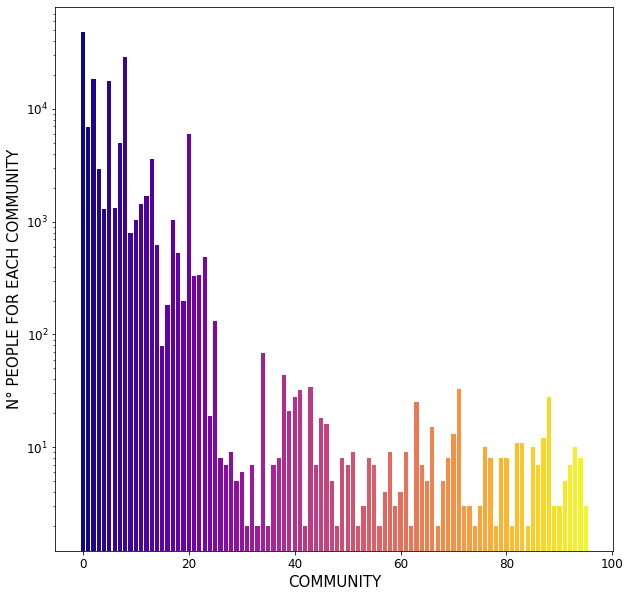

In [22]:
plot_community(partition_louvain_dict)

Considerando la community più numerosa di **Louvain** si analizza la Sentiment all'interno del gruppo

In [21]:
data_louvain = community_sentiment(partition_louvain, dataset_tweet, 0)
data_louvain.to_csv("tweet_louvain0.csv", index=False)
sentiment_louvain_0 = calcola_sentiment(data_louvain)
sentiment_louvain_0

,Happy,Angry,Surprise,Sad,Fear,Neutral
0,688,195,1523,3773,1931,43


In [31]:
data_louvain = pd.read_csv("./tweet_louvain0.csv")
data_louvain

,created_at,id,id_str,full_text,source,truncated,user,quoted_status_id,quoted_status_id_str,is_quote_status,quoted_status,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,user_id_tweet,sentiment_analysis_tweet
0,Tue Oct 06 21:42:32 +0000 2020,1313595523010625536,1313595523010625536,"If you're still social distancing, washing you...","<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1201348645225930752, 'id_str': '1201348...",NaN,NaN,False,NaN,34838,30940,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,NaN,1201348645225930752,"{'Happy': 0.14, 'Angry': 0.0, 'Surprise': 0.14..."
1,Wed Oct 07 08:44:39 +0000 2020,1313762150712827904,1313762150712827904,"If you’re wearing a mask, social distancing an...","<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1201348645225930752, 'id_str': '1201348...",NaN,NaN,False,NaN,371,333,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,NaN,1201348645225930752,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
2,Thu Oct 22 19:27:07 +0000 2020,1319359647707467777,1319359647707467777,"Make sure you vote, wear your mask, continue s...","<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1201348645225930752, 'id_str': '1201348...",NaN,NaN,False,NaN,31,132,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,NaN,1201348645225930752,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.17,..."
3,Sun Oct 18 23:12:13 +0000 2020,1317966744250626048,1317966744250626048,.@realDonaldTrump's Covid Klan Farewell Tour l...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1201348645225930752, 'id_str': '1201348...",NaN,NaN,False,NaN,26,69,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,NaN,1201348645225930752,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
4,Sun Oct 25 17:08:46 +0000 2020,1320411996542697472,1320411996542697472,People are actually blocking me for asking the...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1201348645225930752, 'id_str': '1201348...",NaN,NaN,False,NaN,13,70,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1320411994416156676, 'id_str...",False,False,False,1201348645225930752,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.25,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8148,Sun Mar 01 02:38:09 +0000 2020,1233944586805866496,1233944586805866496,Another great article by @mmfa .\r\nWe need th...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1330387950, 'id_str': '1330387950', 'na...",NaN,NaN,False,NaN,26,18,"{'hashtags': [{'text': 'OneVoice1', 'indices':...",NaN,False,False,False,1330387950,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25..."
8149,Sun Mar 01 02:36:17 +0000 2020,1233944116272058368,1233944116272058368,Trump's buddy. This joker is certifiable. Info...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1330387950, 'id_str': '1330387950', 'na...",NaN,NaN,False,NaN,13,18,"{'hashtags': [{'text': 'OneVoice1', 'indices':...",NaN,False,False,False,1330387950,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ..."
8150,Sun Mar 01 22:14:24 +0000 2020,1234240600565678080,1234240600565678080,More good stuff from @mmfa\r\n#OneVoice1 \r\n\...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1330387950, 'id_str': '1330387950', 'na...",NaN,NaN,False,NaN,12,11,"{'hashtags': [{'text': 'OneVoice1', 'indices':...",NaN,False,False,False,1330387950,"{'Happy': 0.33, 'Angry': 0.33, 'Surprise': 0.3..."
8151,Sun Mar 01 19:07:06 +0000 2020,1234193463589134336,1234193463589134336,This is IMPORTANT!!\r\n\r\n“Coronavirus hyster...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 757118699212009472, 'id_str': '75711869...",NaN,NaN,False,NaN,17,18,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,False,757118699212009472,"{'Happy': 0.33, 'Angry': 0.

## INFOMAP COMMUNITY
Infomap cerca di costruire un raggruppamento che fornisca la lunghezza descrittiva più breve per un random walker sul grafico, dove la lunghezza della descrizione è misurata dal numero atteso di bit per nodo richiesto per codificare un random walk. La descrizione di una rete come un insieme di community interconnesse è intesa come regolarità del flusso di informazioni che passa nella rete, filtrando i dettagli relativamente poco importanti. Le mappe migliori sono quelle che trasmettono una grande quantità di informazioni pur richiedendo una larghezza di banda minima; cioè sono buone compressioni.

In [2]:
if path.exists("./file pickle/infomap_communities.pkl"):
    print("EXIST")
    infile = open("./file pickle/infomap_communities.pkl",'rb')
    infomap_communities = pickle.load(infile)
    infile.close()
else:
    infomap_communities = algorithms.infomap(grafo)
    f = open("./file pickle/infomap_communities.pkl","wb")
    pickle.dump(infomap_communities, f)
    f.close()

infomap_json= infomap_communities.to_json()
infomap_dict = json.loads(infomap_json)

infomap_communities_dict = {} 
for i,c in enumerate(infomap_dict["communities"]): 
    for name in c: 
        infomap_communities_dict[name] = i

infomap_communities_count = {}
for i in range(max(infomap_communities_dict.values())+1):
    infomap_communities_count[i] = len([k for (k, v) in infomap_communities_dict.items() if v == i ])

print("N° di community trovate: ", len(infomap_communities_count))
print("N° utenti per community:\n",infomap_communities_count)

EXIST
N° di community trovate:  81
N° utenti per community:
 {0: 90794, 1: 46326, 2: 5966, 3: 2452, 4: 2257, 5: 356, 6: 319, 7: 129, 8: 123, 9: 96, 10: 94, 11: 56, 12: 44, 13: 41, 14: 33, 15: 28, 16: 28, 17: 21, 18: 18, 19: 18, 20: 16, 21: 15, 22: 15, 23: 12, 24: 12, 25: 12, 26: 11, 27: 11, 28: 11, 29: 11, 30: 10, 31: 10, 32: 10, 33: 9, 34: 9, 35: 9, 36: 9, 37: 9, 38: 8, 39: 8, 40: 8, 41: 8, 42: 8, 43: 8, 44: 8, 45: 7, 46: 7, 47: 7, 48: 7, 49: 7, 50: 7, 51: 7, 52: 7, 53: 7, 54: 6, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 4, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2}


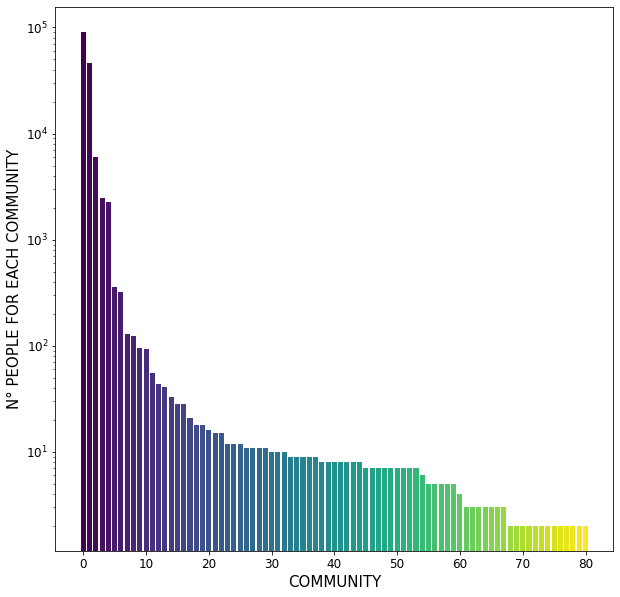

In [24]:
plot_community(infomap_communities_count)

Considerando la community più numerosa di **Infomap** si analizza la Sentiment all'interno del gruppo

In [ ]:
data_infomap = community_sentiment(infomap_communities_dict, dataset_tweet, 0)
data_infomap.to_csv("tweet_infomap0.csv", index=False)
sentiment_infomap_0 = calcola_sentiment(data_infomap)
sentiment_infomap_0

,Happy,Angry,Surprise,Sad,Fear,Neutral
0,1453,389,2280,7477,3592,93


In [39]:
data_infomap = pd.read_csv("./tweet_infomap0.csv")
data_infomap

,created_at,id,id_str,full_text,source,truncated,user,quoted_status_id,quoted_status_id_str,is_quote_status,quoted_status,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,user_id_tweet,sentiment_analysis_tweet
0,Mon Oct 19 02:22:58 +0000 2020,1318014750140321797,1318014750140321797,NEW TODAY: Twitter has blocked a tweet that ha...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 18831926, 'id_str': '18831926', 'name':...",NaN,NaN,False,NaN,4116,16906,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,False,False,NaN,18831926,"{'Happy': 0.11, 'Angry': 0.0, 'Surprise': 0.33..."
1,Sat Oct 17 23:31:39 +0000 2020,1317609249606946820,1317609249606946820,BREAKING—A man arrested after allegedly threat...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 18831926, 'id_str': '18831926', 'name':...",NaN,NaN,False,NaN,3529,6349,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,False,False,False,18831926,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.25,..."
2,Thu Oct 29 17:03:21 +0000 2020,1321860184990535683,1321860184990535683,JUST NOW—Dr. Fauci said there likely no return...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 18831926, 'id_str': '18831926', 'name':...",NaN,NaN,False,NaN,1977,4724,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'media': [{'id': 1321860181807058945, 'id_str...",False,False,False,18831926,"{'Happy': 0.0, 'Angry': 0.17, 'Surprise': 0.17..."
3,Wed Oct 28 01:14:00 +0000 2020,1321258885634793472,1321258885634793472,⚠️Dr Fauci says people will likely need to wea...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 18831926, 'id_str': '18831926', 'name':...",NaN,NaN,False,NaN,1575,3739,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,False,False,False,18831926,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,..."
4,Sun Oct 11 00:19:20 +0000 2020,1315084531645415425,1315084531645415425,PENCE HYPOCRISY—Potential superspreading Pence...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 18831926, 'id_str': '18831926', 'name':...",1.315002e+18,1.315002e+18,True,{'created_at': 'Sat Oct 10 18:51:52 +0000 2020...,929,2032,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,False,False,False,18831926,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,Wed Jul 01 12:13:12 +0000 2020,1278300622761136128,1278300622761136128,"Good morning, We are in July. \r\n\r\nNo braze...","<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 51179056, 'id_str': '51179056', 'name':...",NaN,NaN,False,NaN,13,73,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,NaN,51179056,"{'Happy': 0.11, 'Angry': 0.0, 'Surprise': 0.11..."
15280,Thu Oct 29 21:27:53 +0000 2020,1321926757306507264,1321926757306507264,100% of the proceeds from our Koo masks will b...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 24341907, 'id_str': '24341907', 'name':...",NaN,NaN,False,NaN,13,76,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1321926739048673280, 'id_str...",False,False,False,24341907,"{'Happy': 0.29, 'Angry': 0.14, 'Surprise': 0.0..."
15281,Fri Oct 09 14:48:05 +0000 2020,1314578383754481664,1314578383754481664,New video! \r\n\r\nThe most important fashion ...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 24341907, 'id_str': '24341907', 'name':...",NaN,NaN,False,NaN,13,59,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,False,False,False,24341907,"{'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.14..."
15282,Tue Aug 11 02:52:41 +0000 2020,1293017464003944453,1293017464003944453,damn and some of u think it’s too hard to do s...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 1242245990, 'id_str': '1242245990', 'na...",1.291404e+18,1.291404e+18,True,{'created_at': 'Thu Aug 06 16:02:23 +0000 2020...

## CLIQUE COMMUNITY
Le cliques sono sottografi in cui ogni nodo è connesso a ogni altro nodo della cricca. Poiché i nodi non possono essere collegati più strettamente di così, non sorprende che ci siano molti approcci al rilevamento di comunità nelle reti basati sul rilevamento di clique in un grafo.

In [19]:
clique_communities = []

if path.exists("./file pickle/clique_communities.pkl"):
    print('EXIST')
    infile = open("./file pickle/clique_communities.pkl",'rb')
    clique_communities = pickle.load(infile)
    infile.close()
else:
    clique_communities = list(community.k_clique_communities(grafo, 3))
    f = open("./file pickle/clique_communities.pkl","wb")
    pickle.dump(clique_communities, f)
    f.close()

print("N° di community a 3 clique: ",len(clique_communities))

EXIST
N° di community a 3 clique:  756


# PLOT

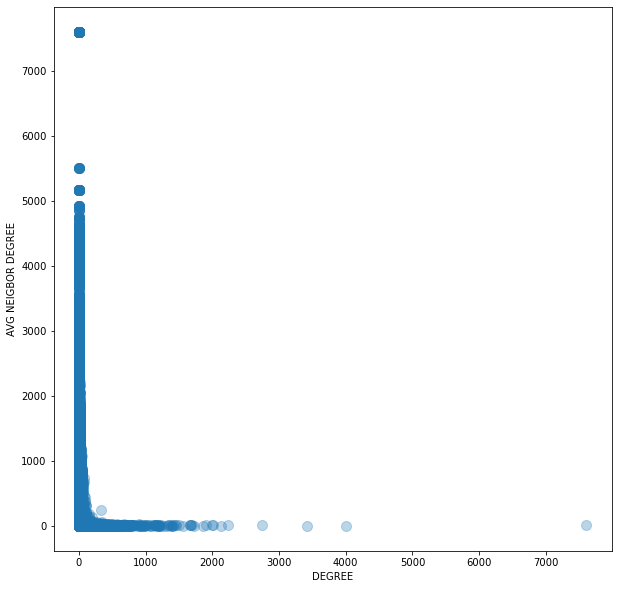

In [13]:
r=degree_assortativity
x=degree_dict.values()
y=avg_neighbor_degree.values()
plt.figure(figsize=(10,10))
plt.xlabel("DEGREE")
plt.ylabel("AVG NEIGBOR DEGREE");
plt.scatter(x, y,marker='o',s=100, alpha=0.3)

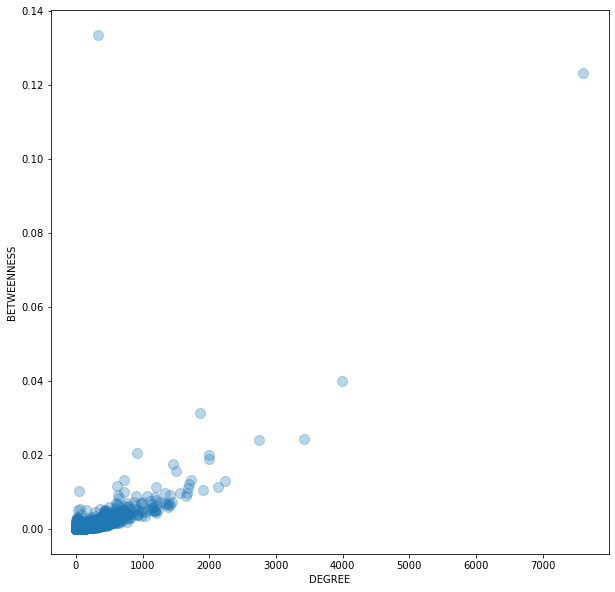

In [14]:
x=degree_dict.values()
y=betweenness_dict.values()
plt.figure(figsize=(10,10))
plt.xlabel("DEGREE")
plt.ylabel("BETWEENNESS");
plt.scatter(x, y,marker='o',s=100, alpha=0.3)

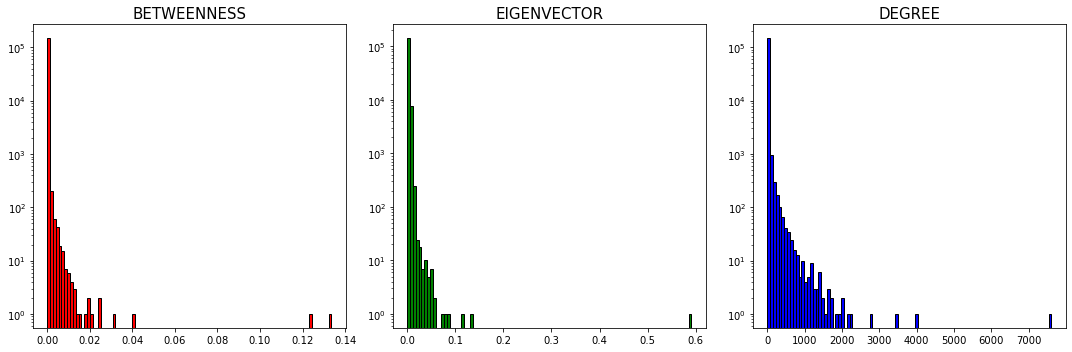

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()

ax0.hist(list(betweenness_dict.values()),bins=100, log=True, color='red', edgecolor="k")
ax0.set_title('BETWEENNESS',fontsize=15)

ax1.hist(list(eigenvector_dict.values()),bins=100, log=True, color='green', edgecolor="k")
ax1.set_title('EIGENVECTOR',fontsize=15)

ax2.hist(list(degree_dict.values()),bins=100, log=True, color='blue', edgecolor="k")
ax2.set_title('DEGREE',fontsize=15)

fig.tight_layout()
plt.show()

In [18]:
infile = open("./file pickle/pos_spring_layout.pkl",'rb')
pos = pickle.load(infile)
infile.close()

## PLOT 1: dimensione e colore dei nodi in base a degree e betweenness

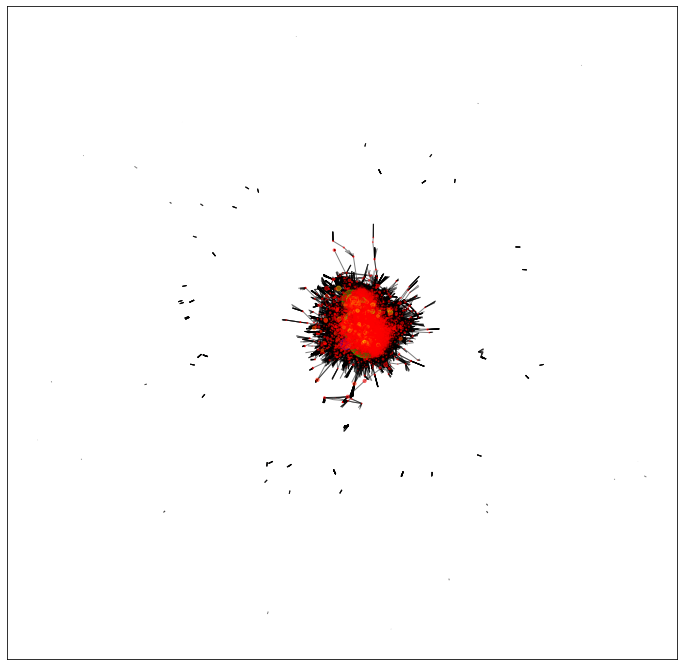

In [20]:
plt.figure(figsize=(12,12))
cmap = cm.get_cmap('prism')
node_color = [2000.0 * grafo.degree(v) for v in grafo]
node_size =  [v * 10000 for v in betweenness_dict.values()]

nx.draw_networkx(grafo, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, cmap=cmap, alpha=0.5)

## PLOT 2: plot basato sulla prima community di Louvain con Sentiment nodi Tweet

In [ ]:
data_infomap = pd.read_csv("./tweet_infomap0.csv")
dataset_infomap = pd.DataFrame()
for p in data_infomap['user_id_tweet'].unique():
    dataset_infomap = dataset_infomap.append(dataset[dataset['user_id_tweet']==int(p)])
dataset_infomap.to_csv("./dataset_infomap.csv", index=False)
print(len(dataset_infomap))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
407666


In [ ]:
dataset_infomap = pd.read_csv("./dataset_infomap.csv")

In [ ]:
grafo_infomap = nx.Graph()

for (user_retweet, user_tweet, sentiment) in zip(dataset_infomap['user_id'], dataset_infomap['user_id_tweet'], dataset_infomap['sentiment_analysis_tweet']):
    grafo_infomap.add_edge(str(user_tweet), str(user_retweet))
    color_dict[str(user_tweet)] = extract_color(sentiment)
    color_dict[str(user_retweet)] = 'black'

nx.set_node_attributes(grafo_infomap, color_dict, 'color')
print(nx.info(grafo_infomap))

Name: 
Type: Graph
Number of nodes: 94195
Number of edges: 340229
Average degree:   7.2239


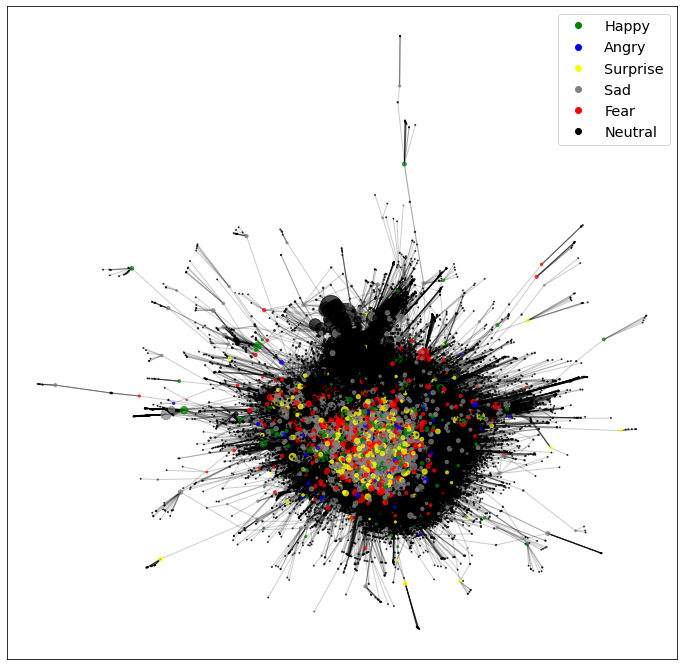

In [ ]:
legend = {'Happy': 'green', 'Angry': 'blue', 'Surprise': 'yellow', 'Sad': 'grey', 'Fear': 'red', 'Neutral': 'black' }

node_color = [grafo_infomap.nodes[n]['color'] for n in list(grafo_infomap.nodes())]
node_size =  [degree_dict[str(n)] for n in grafo_infomap]
    
plt.figure(figsize=(12,12))
cmap = cm.get_cmap('prism')
nx.draw_networkx_nodes(grafo_infomap, pos=pos, node_color=node_color, node_size=node_size, cmap=cmap, alpha=0.7)
nx.draw_networkx_edges(grafo_infomap, pos, alpha=0.2)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend.values()]
plt.legend(markers, legend.keys(), loc='best', fontsize='x-large')

## PLOT 3: plot delle diverse community Modularity (colori identificano community)

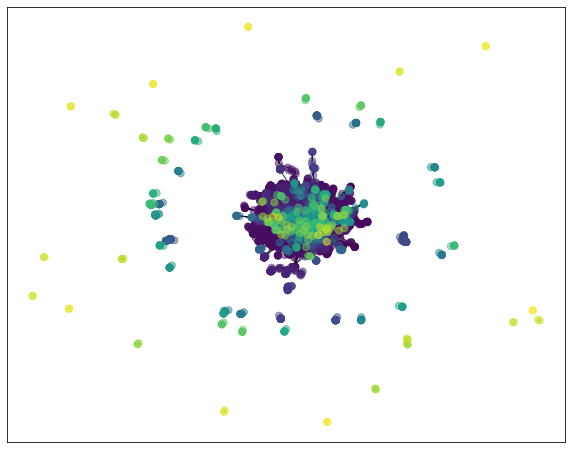

In [18]:
# color the nodes according to their partition
plt.figure(figsize=(10,8))
cmap = cm.get_cmap('viridis', max(modularity_dict.values()) + 1)
nx.draw_networkx_nodes(grafo, pos, modularity_dict.keys(), node_size=50, cmap=cmap, node_color=list(modularity_dict.values()), alpha=0.5)
nx.draw_networkx_edges(grafo, pos, alpha=0.8)
plt.show()

## PLOT 4: Sentiment Analysis sui Tweet

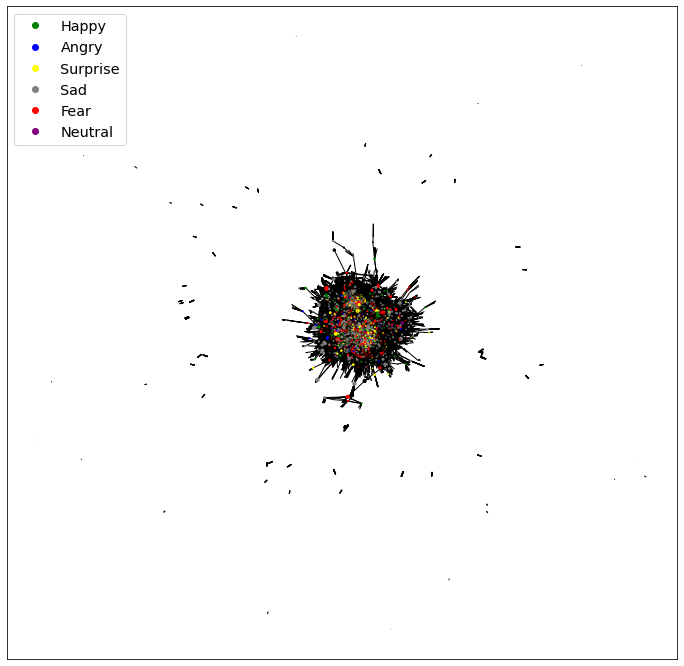

In [57]:
legend = {'Happy': 'green', 'Angry': 'blue', 'Surprise': 'yellow', 'Sad': 'grey', 'Fear': 'red', 'Neutral': 'purple' }

plt.figure(figsize=(12,12))
cmap = cm.get_cmap('prism')
node_size =  [v * 10000 for v in betweenness_dict.values()]
node_color = [grafo.nodes[node]['color'] for node in grafo.nodes()]

nx.draw_networkx(grafo, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, cmap=cmap)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend.values()]
plt.legend(markers, legend.keys(), loc='best', fontsize='x-large')

## PLOT 5: grafo delle 20 persone più influenti 
Creo un sotto dataset che si riferisce alle 20 persone più influenti e grafico le interazioni 

In [ ]:
dt = pd.DataFrame()
for tb in top_betweenness:
    dt = dt.append(datase[dataset['user_id_tweet']==np.int64(tb[0])])
print(len(dt))

In [ ]:
grafo2 = nx.Graph()
color_dict = {}
for (user_retweet, user_tweet, sentiment) in zip(dt['user_id'], dt['user_id_tweet'], dt['sentiment_analysis_tweet']):
    grafo2.add_edge(user_tweet, user_retweet)
    color_dict[user_tweet] = extract_color(sentiment)
    color_dict[user_retweet] = 'black'

nx.set_node_attributes(grafo2, color_dict, 'color')
print(nx.info(grafo2))

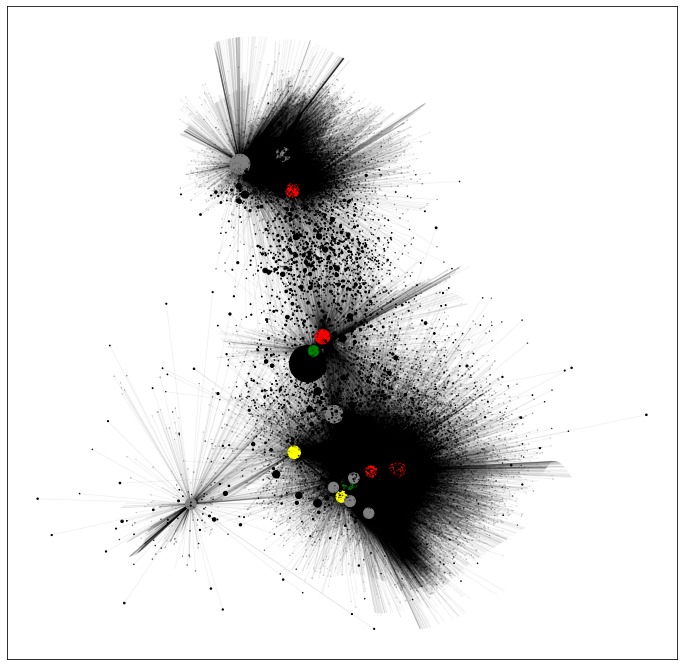

In [37]:
plt.figure(figsize=(12,12))
cmap = cm.get_cmap('gist_ncar')
node_color = [grafo2.nodes[node]['color'] for node in grafo2.nodes()]
node_size =  [10000 * betweenness_dict[n] for n in grafo2]

nx.draw_networkx_nodes(grafo2, pos=pos, with_labels=False, node_size=node_size, node_color=node_color, cmap=cmap)
nx.draw_networkx_edges(grafo2, pos, alpha=0.05)
